# Basics of Convolutional Neural Networks
# Project Description
In this notebook I will go over some basics for convoluitinal neural networks. 

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt

# How CNN's Work
First lets go over what a convolution is. I will go over very basics in this notebook but if you want to read more I have a notebook on my github show casing what convolutions are and do. The notebook can be found [here](https://github.com/GaelGil/notebooks/blob/master/convolutions/convolutuionExample.ipynb). A convolution is when

So what our model is doing is passing a kernel over the image to get another image. This is what a convolution is. 

Feature extraction. During convolutions the filter is picking up on things from the image. For example lets say we have a photo of a the letter `X`. The filter would pick the diagonal lines on the image. During the convolution the filter would pick that up and pass it forward. This is feature extraction. The convolutions are getting us our features for us. This means that the convolutions are telling us what in this photo is significant. If we had an image of the letter `O`. The kernels would pick up on the curves of the letter and pass those forward. This will help us learn what is important in the `O`. Therefore getting us features which are important for our model to make a prediction. Features are data. For example in mnist our features are all the pixels in the image. In the .... dataset the is our features. So what convolutions do is get those for us. 

Once we have these features what do we do with them? Once we have the features what we do is pass them through a fully connected neural network. We feed the features forward to get an output. To learn more about fully connected networks check out my notebook on [github](https://github.com/GaelGil/notebooks/blob/master/back-propagation/back_propagation.ipynb). It goes over feeding forward and back propagation. That is how we go from image to a prediction. One way to think about it is using mnist. 
- What is convolution
- What is a filter/kernel
- Max/Min pooling
- How do we get prediction

In [47]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


# Loading and Formating the Data
- where did the data come from
- loading the data. Explain transformations
- showing some images

In [3]:
TRANSFORM_IMG = transforms.Compose([
    transforms.Resize((255, 255)),
    transforms.ToTensor(),
   transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

In [4]:
DATA_PATH = './PetImages/'

In [5]:
data_set = ImageFolder(DATA_PATH, transform=TRANSFORM_IMG)
data_set

Dataset ImageFolder
    Number of datapoints: 25000
    Root location: ./PetImages/
    StandardTransform
Transform: Compose(
               Resize(size=(255, 255), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [6]:
# get size of entire dataset
len_data_set = len(data_set)

In [7]:
# get the size of train, validation, and test count
train_count = int(0.7 * len_data_set)
valid_count = int(0.2 * len_data_set)
test_count = len_data_set - train_count - valid_count

In [8]:
# split the data into train, validation and test sizes
train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(data_set, (train_count, valid_count, test_count))

In [9]:
train_dataset_loader = torch.utils.data.DataLoader(train_dataset, batch_size=16, shuffle=True)
valid_dataset_loader = torch.utils.data.DataLoader(valid_dataset, batch_size=16, shuffle=True)
test_dataset_loader = torch.utils.data.DataLoader(test_dataset, batch_size=16, shuffle=True)

In [23]:
# get a batch from the train dataset
images, labels = next(iter(train_dataset_loader))

In [26]:
# functions to show an image
classes = ('cat', 'dog')
def imshow(img):
    npimg = img.numpy()
    plt.figure(figsize=(150,150))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


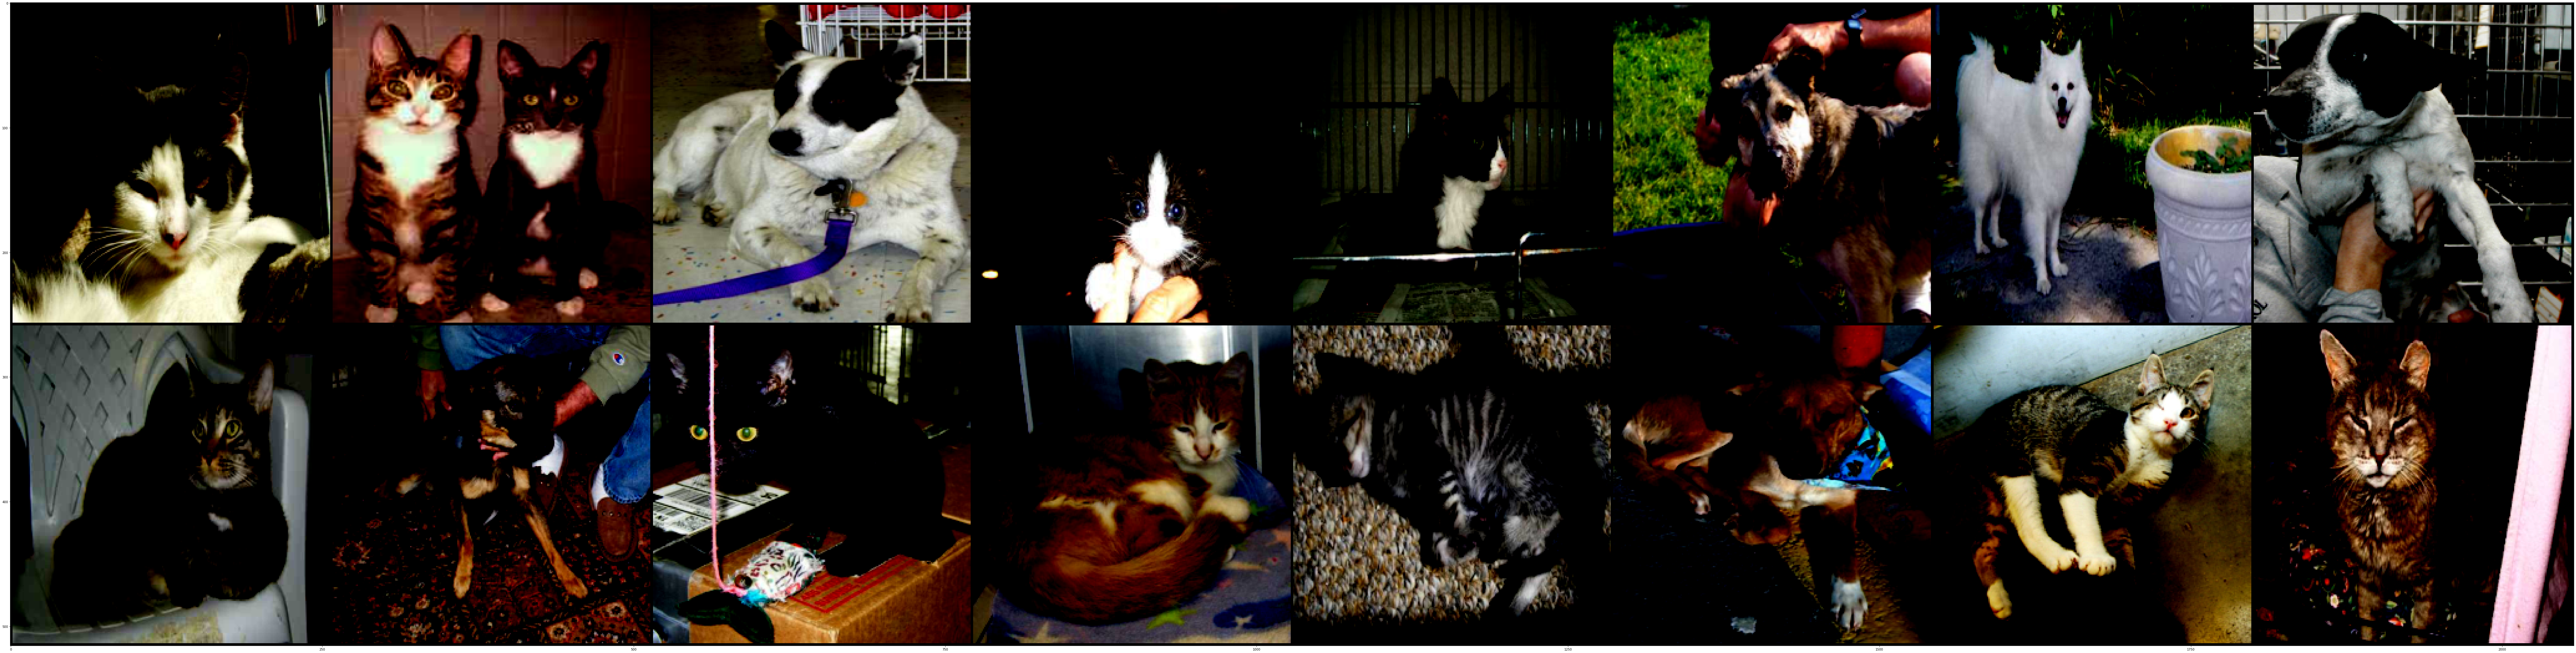

In [28]:
# show images
imshow(torchvision.utils.make_grid(images))

# Creating the Model
- Explain what our model will have
- explain what will happen during training

In [29]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=6, kernel_size=5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5)
        # got the input for fc1 by passing a sample image
        self.fc1 = nn.Linear(32*28*28, 120)
        self.fc2 = nn.Linear(120, 1)

    def forward(self, x):
        # convolution layer -> relu -> maxpool (stride 2)
        x = self.pool(F.relu(self.conv1(x)))
        # convolution layer -> relu -> maxpool (stride 2)
        x = self.pool(F.relu(self.conv2(x)))
        # convolution layer -> relu -> maxpool (stride 2)
        x = self.pool(F.relu(self.conv3(x)))
        # flatten our output from the convolutional layers
        x = torch.flatten(x, 1)
        # first fully connected layer
        x = self.fc1(x)
        # second fully 
        x = self.fc2(x)
        return  x

# Training the Model

In [43]:
def train(model, train_data, epochs, lr):
    """
    Function to train our neural network.
    Parameters:
    -----------
    model : class
        The model we are trying to train.
    data : 
        The data for training.
    epochs : int
        How many iterations of training we are going to do.
    lr : float
        The learning rate of our model
    """
    net = Net()
    criterion = nn.BCEWithLogitsLoss()
    optimizer = optim.Adam(net.parameters(), lr=lr)
    for epoch in range(epochs):  # loop over the dataset multiple times
        loss = 0
        for i, data in enumerate(train_data, 0):
            inputs, labels = data
            # 1 or -1
            labels = labels.unsqueeze(1).float()
            # zero the parameter gradients
            optimizer.zero_grad()
            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    PATH = './cifar_net.pth'
    torch.save(net.state_dict(), PATH)
    print('Done')

In [44]:
train(train_data=train_dataset_loader, epochs=10,  lr=0.001)

KeyboardInterrupt: 

# Analyzing Performence

In [ ]:
def test()

# What Does the CNN See?
- Show images of what the model is doing to the images as it passses through the network